# USP - EACH - Reconhecimento de Padrões - Abril de 2020

### CLASSIFICAÇÃO DE MODELOS CARDÍACOS TRIDIMENSIONAIS RELACIONADA À PRESENÇA OU À AUSÊNCIA DE CARDIOMIOPATIA

## Grupo 08/H

## Seleção de Características
### Arquivo de Entrada: Volume_20200414.csv

#### Descrição
##### Inclusão da coluna Target (Variável dependente Alvo)
-- Última Coluna 
- 0 - Sem Anomalias - até a linha 101 
- 1 - Hipertróficos - da 102 até a linha 284 
- 2 - Dilatados - a partir da linha 285 inclusive

#### Nesta atividade vamos aplicar algumas técnicas de classificação de features (características) com objetivo de
#### escolher quais poderiam ser consideradas para treinamentos dos modelos e teste.

<br>==================================================================================================================</br>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [2]:
# Abertura e informações da Base de Dados

df = pd.read_csv('Volume_20200414.csv', header=None)

print('****************************')
print('**** Dados do DataFrame ****')
print('****************************')
print(f'Linhas e Colunas: {df.shape}')
print('\n**** Informações Gerais ****')
print(df.info())
print('\n**** Primeiras 5 amostras ****')
print(df.head())
print('\n****Últimas 5 amostras ****')
print(df.tail())
print()

****************************
**** Dados do DataFrame ****
****************************
Linhas e Colunas: (400, 3)

**** Informações Gerais ****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
0    400 non-null object
1    400 non-null int64
2    400 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.5+ KB
None

**** Primeiras 5 amostras ****
       0    1    2
0  id001   74  110
1  id002   94  126
2  id003   92  157
3  id004  106  107
4  id005   68   73

****Últimas 5 amostras ****
         0    1    2
395  id396   97  110
396  id397  161  298
397  id398  176  223
398  id399  261  315
399  id400  153  254



In [3]:
# Inclusão da coluna Target (Variável dependente - alvo)
df.loc[:, "TARGET"] = int(0)
df.loc[0:101, "TARGET"] = int(0)
df.loc[101:284, "TARGET"] = int(1)
df.loc[284:, "TARGET"] = int(2)

# Ajuste do nome das colunas
df = df.rename(columns={0: 'ID', 1:'VOLUME', 2:'MASSA'})

print('****************************')
print('**** Dados do DataFrame ****')
print('****************************')
print(f'Linhas e Colunas: {df.shape}')
print('\n**** Informações Gerais ****')
print(df.info())
print('\n**** Primeiras 5 amostras ****')
print(df.head())
print('\n****Últimas 5 amostras ****')
print(df.tail())
print()

****************************
**** Dados do DataFrame ****
****************************
Linhas e Colunas: (400, 4)

**** Informações Gerais ****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
ID        400 non-null object
VOLUME    400 non-null int64
MASSA     400 non-null int64
TARGET    400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
None

**** Primeiras 5 amostras ****
      ID  VOLUME  MASSA  TARGET
0  id001      74    110       0
1  id002      94    126       0
2  id003      92    157       0
3  id004     106    107       0
4  id005      68     73       0

****Últimas 5 amostras ****
        ID  VOLUME  MASSA  TARGET
395  id396      97    110       2
396  id397     161    298       2
397  id398     176    223       2
398  id399     261    315       2
399  id400     153    254       2



<br>==================================================================================================================</br>
## Técnica de Verificação: Filtro

In [4]:
# Método de correlação entre as variáveis
df.corr()

,VOLUME,MASSA,TARGET
VOLUME,1.000000,0.116449,0.248043
MASSA,0.116449,1.000000,0.391880
TARGET,0.248043,0.391880,1.000000


####
## Análise
####
#### Aplicando um método de correlação, que compara todas as colunas entre sí, e tem como: correlação total 1.00
#### correlação negativa total -1.00 e sem correlação 0.00.
#### Este método de correlação é baseado em Pearson, mostrando um relacionamento linear entre as variáveis. 
#### Se houver um relacionamento não-linear, este método pode não ser uma boa medida.
#### Observamos que a correlação entre o volume e o Target é positiva, mas baixa.
#### A correlação entre a massa e o Target, também, é positiva, e um pouco mais considerável.
####

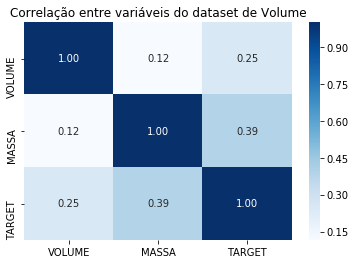

In [5]:
# Gráfico de Correlação
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Volume')
plt.show()

### Outra técnica de filtro

In [8]:
# Verificando a importância das features
X = df.iloc[:, 1:3]
y = df.iloc[:, 3]

# Aplicando o selecionador de features
X_novo = SelectKBest(chi2, k=1).fit_transform(X, y)

print(X_novo[0:5])

[[110]
 [126]
 [157]
 [107]
 [ 73]]


####
#### Aplicando um método, dentro de uma técnica por camada de seleção de features.
#### Observamos que a técnica escolheu a feature Massa como a mais considerável.
#### De uma maneira análoga a técnica anterior.
#### Como o dataset possui apenas 2 features, escolherá aquele que atingiu um melhor score no teste estatístico
#### escolhido (chi2). A parte boa do SelectKBest é que ele funciona para problemas de regressão também, 
#### com testes estatísticos como f_regression e mutual_info_regression. 
#### A parte ruim é que escolher o número K ideal é difícil. Muitas das vezes, o valor atribuído é bem empírico, 
#### mas pode-se tentar contornar isso com o uso do SelectPercentile, que irá selecionar X% das melhores features.
####

In [10]:
# Verificando a importância das features
X = df.iloc[:, 1:3]
y = df.iloc[:, 3]

# Aplicando o selecionador de features
model = SelectPercentile(chi2, percentile=10)
X_novo = model.fit_transform(X, y)
print('\nModelo chi2:', model.scores_, '\nColuna de dados escolhida:\n', X_novo[0:5])


Modelo chi2: [2789.62062444 7631.27374448] 
Coluna de dados escolhida:
 [[110]
 [126]
 [157]
 [107]
 [ 73]]


####
#### Verificado que o percentual da coluna massa é maior.
####

<br>==================================================================================================================</br>
## Técnica de Verificação: Embutido

In [6]:
# Verificando a importância das features a partir da aplicação de um modelo (Random Forest / Árvores Randômicas)
X = df.iloc[:, 1:3]
y = df.iloc[:, 3]

# Treinando o modelo na base inteira
model  = RandomForestClassifier()
model.fit(X, y)

# Verificando a importância de cada feature
model.feature_importances_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.44985559, 0.55014441])

####
## Análise
####
#### Aplicando um método, dentro de uma técnica embutida de seleção de features, de Árvores Aleatórias,
#### utilizamos a própria estruturação do modelo a importância percentual de cada feature no modelo (soma 100%).
#### Observamos que a correlação da massa é um pouco maior que a do volume, para este modelo,
#### mas, ainda, baixa.
####

Text(0.5, 1.0, 'Importância de cada feature')

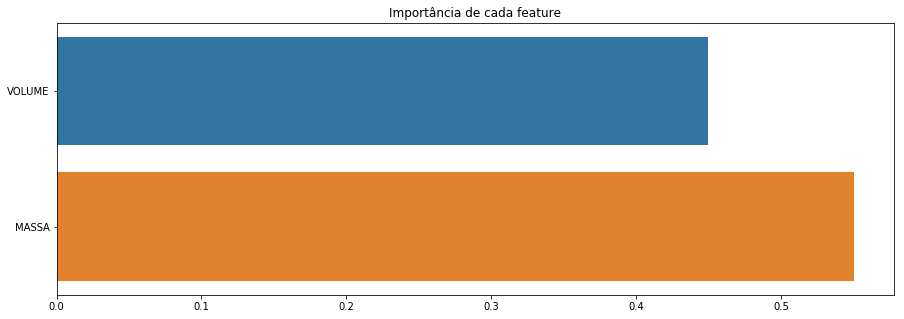

In [7]:
# Gráfico
plt.figure(figsize=(15, 5))
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

<br>==================================================================================================================</br>
## Técnica de Verificação: Wrapper

## Aplicando RFE (Recursive Feature Elimination) 
### Aqui vamos utilizar o modelo LinearSVC que implementa um algoritmo de classificação, 
### o SVM (máquina de vetores de suporte).

In [11]:
# Verificando a importância das features a partir da aplicação de um modelo (Random Forest / Árvores Randômicas)
X = df.iloc[:, 1:3]
y = df.iloc[:, 3]

model = LinearSVC(max_iter=1000)
mdrf = RFE(model, step=1)
Xrf = mdrf.fit(X, y)

print('Com 1.000 interações: ', Xrf.support_)
print('Com 1.000 interações: ', Xrf.ranking_)

model = LinearSVC(max_iter=1000000)
mdrf = RFE(model, step=1)
Xrf = mdrf.fit(X, y)

print('Com 1.000.000 interações: ', Xrf.support_)
print('Com 1.000.000 interações: ', Xrf.ranking_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Com 1.000 interações:  [ True False]
Com 1.000 interações:  [1 2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Com 1.000.000 interações:  [False  True]
Com 1.000.000 interações:  [2 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


####
## Análise
####
#### Os resultados na aplicação do RFE mudam quando aplicamos menos do que 1.000.000 interações.
#### Acima disto a feature escolhida é a massa (como nas técnicas anteriores), mas
#### abaixo disto a feature mais considerada é volume e não massa.
####